In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [13]:
from citipy import citipy

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [18]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | svetlogorsk
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | kaitangata
Processing Record 9 of Set 1 | peniche
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | san quintin
Processing Record 12 of Set 1 | vostok
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | samarai
Processing Record 18 of Set 1 | airai
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | namwala
Processing Record 21 of Set 1 | gurgan
City not found. Skipping...
Processing Record 22 of Set 1 | henties bay
Processing Record 23 of Set 1 | port-gentil
Processing Record 24 of Set 1 | rib

Processing Record 39 of Set 4 | bethel
Processing Record 40 of Set 4 | beringovskiy
Processing Record 41 of Set 4 | valparaiso
Processing Record 42 of Set 4 | havre-saint-pierre
Processing Record 43 of Set 4 | mtimbira
Processing Record 44 of Set 4 | popondetta
Processing Record 45 of Set 4 | taltal
Processing Record 46 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | bredasdorp
Processing Record 49 of Set 4 | poum
Processing Record 50 of Set 4 | rongcheng
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | bangassou
Processing Record 3 of Set 5 | buluang
Processing Record 4 of Set 5 | nyuksenitsa
Processing Record 5 of Set 5 | souillac
Processing Record 6 of Set 5 | zyryanka
Processing Record 7 of Set 5 | mount isa
Processing Record 8 of Set 5 | caravelas
Processing Record 9 of Set 5 | yeppoon
Processing Record 10 of Set 5 | challapata
Processing Record 11 of Set 5 | yeniseysk
Process

Processing Record 27 of Set 8 | siemiatycze
Processing Record 28 of Set 8 | lazaro cardenas
Processing Record 29 of Set 8 | olafsvik
Processing Record 30 of Set 8 | calbuco
Processing Record 31 of Set 8 | karamea
City not found. Skipping...
Processing Record 32 of Set 8 | ngama
Processing Record 33 of Set 8 | gwanda
Processing Record 34 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 35 of Set 8 | ailigandi
Processing Record 36 of Set 8 | abnub
Processing Record 37 of Set 8 | tamiahua
Processing Record 38 of Set 8 | hami
Processing Record 39 of Set 8 | belaya gora
Processing Record 40 of Set 8 | chokurdakh
Processing Record 41 of Set 8 | christchurch
Processing Record 42 of Set 8 | acarau
Processing Record 43 of Set 8 | taburao
City not found. Skipping...
Processing Record 44 of Set 8 | monticello
Processing Record 45 of Set 8 | alice springs
Processing Record 46 of Set 8 | ambunti
Processing Record 47 of Set 8 | okhotsk
Processing Record 48 of Set 8 | h

Processing Record 14 of Set 12 | pasighat
Processing Record 15 of Set 12 | sorong
Processing Record 16 of Set 12 | husavik
Processing Record 17 of Set 12 | morehead
Processing Record 18 of Set 12 | progreso
Processing Record 19 of Set 12 | kumluca
Processing Record 20 of Set 12 | merauke
Processing Record 21 of Set 12 | naryan-mar
Processing Record 22 of Set 12 | den helder
Processing Record 23 of Set 12 | margate
Processing Record 24 of Set 12 | jose de freitas
Processing Record 25 of Set 12 | rabo de peixe
Processing Record 26 of Set 12 | kharan
Processing Record 27 of Set 12 | manzhouli
Processing Record 28 of Set 12 | atlantic beach
Processing Record 29 of Set 12 | mangrol
Processing Record 30 of Set 12 | innisfail
Processing Record 31 of Set 12 | barcelona
Processing Record 32 of Set 12 | manzil kamil
Processing Record 33 of Set 12 | prince rupert
Processing Record 34 of Set 12 | zaozerne
Processing Record 35 of Set 12 | kuminskiy
Processing Record 36 of Set 12 | liverpool
Process

In [19]:
len(city_data)

550

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Svetlogorsk,52.6333,29.7333,50.41,77,83,4.41,BY,2022-09-20 16:01:55
1,Rikitea,-23.1203,-134.9692,72.82,73,0,14.41,PF,2022-09-20 16:01:55
2,Butaritari,3.0707,172.7902,80.64,74,100,7.72,KI,2022-09-20 16:01:55
3,Barrow,71.2906,-156.7887,30.22,93,40,6.91,US,2022-09-20 16:01:56
4,Punta Arenas,-53.1500,-70.9167,44.11,65,100,11.61,CL,2022-09-20 16:01:56
5,Hilo,19.7297,-155.0900,72.28,83,20,8.05,US,2022-09-20 15:58:04
6,Ushuaia,-54.8000,-68.3000,43.65,56,100,8.10,AR,2022-09-20 16:01:56
7,Kaitangata,-46.2817,169.8464,47.93,97,100,3.22,NZ,2022-09-20 16:01:57
8,Peniche,39.3558,-9.3811,84.07,77,2,6.96,PT,2022-09-20 16:01:57
9,Busselton,-33.6500,115.3333,57.15,75,3,14.34,AU,2022-09-20 16:01:57


In [21]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Svetlogorsk,BY,2022-09-20 16:01:55,52.6333,29.7333,50.41,77,83,4.41
1,Rikitea,PF,2022-09-20 16:01:55,-23.1203,-134.9692,72.82,73,0,14.41
2,Butaritari,KI,2022-09-20 16:01:55,3.0707,172.7902,80.64,74,100,7.72
3,Barrow,US,2022-09-20 16:01:56,71.2906,-156.7887,30.22,93,40,6.91
4,Punta Arenas,CL,2022-09-20 16:01:56,-53.1500,-70.9167,44.11,65,100,11.61


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
output_data_file = "weather_data/cities.csv"
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Svetlogorsk,52.6333,29.7333,50.41,77,83,4.41,BY,2022-09-20 16:01:55
1,Rikitea,-23.1203,-134.9692,72.82,73,0,14.41,PF,2022-09-20 16:01:55
2,Butaritari,3.0707,172.7902,80.64,74,100,7.72,KI,2022-09-20 16:01:55
3,Barrow,71.2906,-156.7887,30.22,93,40,6.91,US,2022-09-20 16:01:56
4,Punta Arenas,-53.1500,-70.9167,44.11,65,100,11.61,CL,2022-09-20 16:01:56
5,Hilo,19.7297,-155.0900,72.28,83,20,8.05,US,2022-09-20 15:58:04
6,Ushuaia,-54.8000,-68.3000,43.65,56,100,8.10,AR,2022-09-20 16:01:56
7,Kaitangata,-46.2817,169.8464,47.93,97,100,3.22,NZ,2022-09-20 16:01:57
8,Peniche,39.3558,-9.3811,84.07,77,2,6.96,PT,2022-09-20 16:01:57
9,Busselton,-33.6500,115.3333,57.15,75,3,14.34,AU,2022-09-20 16:01:57


In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

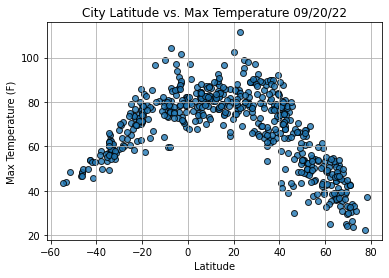

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

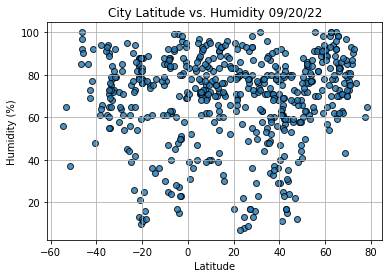

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

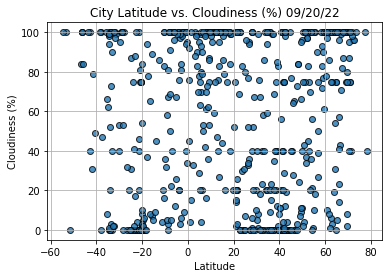

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

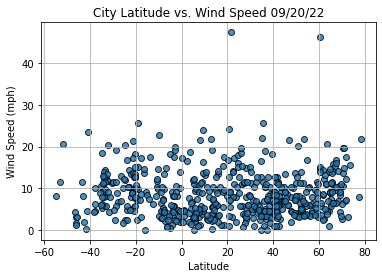

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

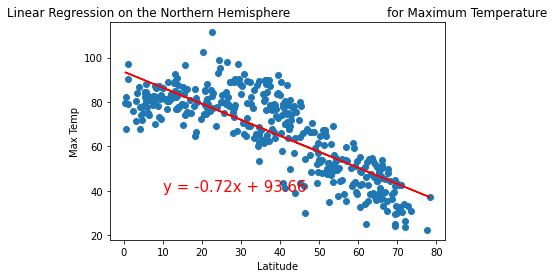

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

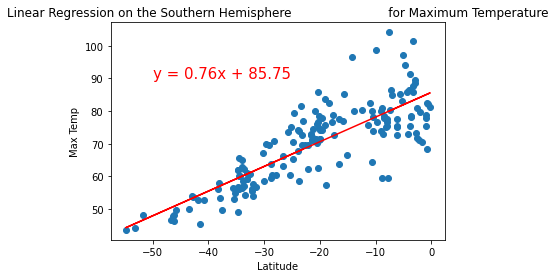

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

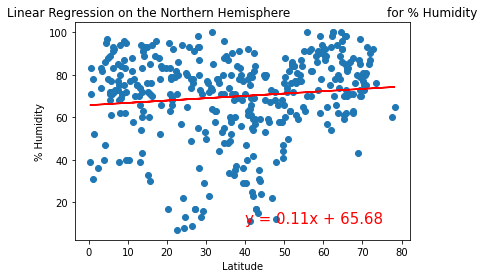

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

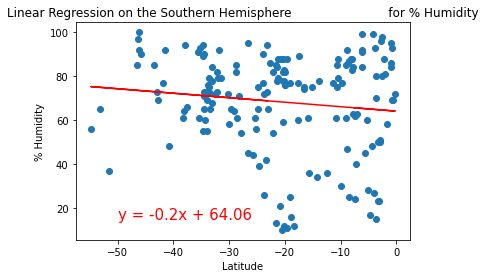

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

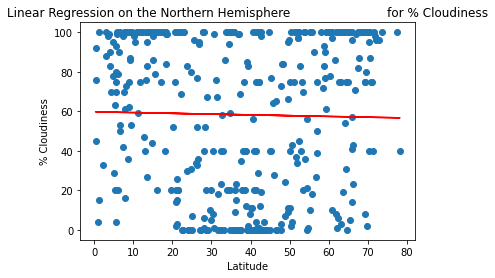

In [36]:
# Linear regression on the northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

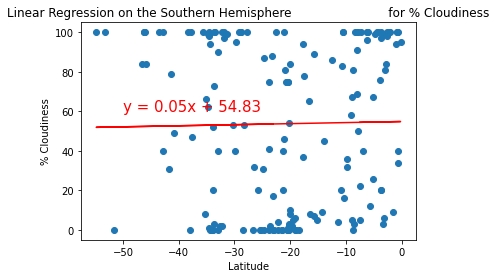

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

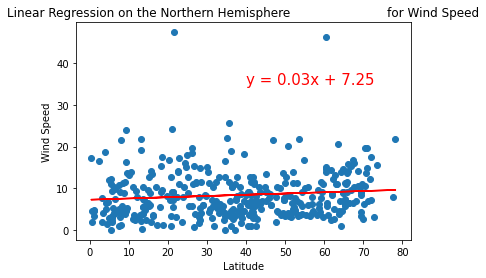

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

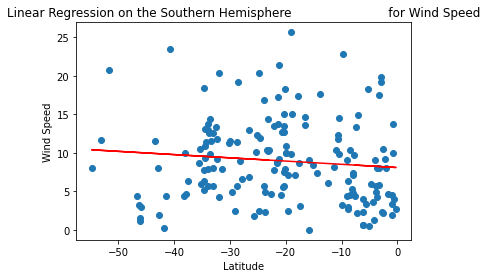

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))